

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>



**1. Objetivo do experimento e hipótese**

O objetivo do experimento é avaliar se a introdução de um sistema aprimorado de recomendações impacta positivamente o funil de conversão de novos usuários de uma loja virtual internacional. O foco está no comportamento dos usuários durante os primeiros 14 dias após o cadastro, analisando-se as etapas de visualização de páginas de produto, adição de itens ao carrinho e finalização da compra.

A hipótese nula assume que o novo sistema de recomendações não produz diferenças significativas nas taxas de conversão entre os grupos de controle e teste. A hipótese alternativa sustenta que os usuários expostos ao novo sistema apresentam um aumento mínimo de 10% nas taxas de conversão em todas as etapas do funil, em comparação ao grupo de controle, dentro do período de observação definido.

**2. Limitações do desenho experimental**

O desenho experimental apresenta limitações que podem influenciar os resultados. A execução simultânea de campanhas de marketing durante o período do teste pode introduzir vieses externos, dificultando a atribuição dos efeitos observados exclusivamente ao sistema de recomendações. Além disso, o experimento foi realizado em um período marcado por forte sazonalidade, o que pode afetar o comportamento dos usuários e limitar a generalização dos resultados.

Há também restrições relacionadas à amostra, uma vez que o teste se concentrou em apenas uma fração dos novos usuários da União Europeia e em um intervalo curto de tempo, o que pode comprometer o poder estatístico. Por fim, o foco exclusivo em novos usuários e a avaliação baseada apenas em métricas intermediárias do funil reduzem o alcance das conclusões, já que não permitem inferir impactos sobre usuários recorrentes nem sobre métricas finais de valor para o negócio.

**3. Diagnóstico inicial dos dados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
mkt=pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users=pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events=pd.read_csv('/datasets/final_ab_events_upd_us.csv')
ptcpt=pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [3]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [5]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [6]:
ptcpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


*Tipos incorretos de variáveis*

Nos dataframes: mkt, new_users e events, as colunas de datas precisam ser convertidas para datetime.

In [7]:
mkt['start_dt']=pd.to_datetime(mkt['start_dt'])
mkt['finish_dt']=pd.to_datetime(mkt['finish_dt'])
new_users['first_date']=pd.to_datetime(new_users['first_date'])
events['event_dt']=pd.to_datetime(events['event_dt'])

In [8]:
print(mkt['start_dt'].dtype)
print(mkt['finish_dt'].dtype)
print(new_users['first_date'].dtype)
print(events['event_dt'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [9]:
mkt.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [10]:
new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [11]:
events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [12]:
ptcpt.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

*Valores ausentes*

Somente no dataframe events na coluna details possui 363447 valores ausentes. Como é uma coluna de dados adicionais e a quantidade de valores ausentes é grande, entende-se que é uma coluna de preenchimento opcional, portanto não haverá impacto em deixar os valores ausentes no dataframe.

In [13]:
mkt.duplicated().sum()

0

In [14]:
new_users.duplicated().sum()

0

In [15]:
events.duplicated().sum()

0

In [16]:
ptcpt.duplicated().sum()

0

*Valores duplicados*

Não há valores duplicados em nenhum dataframe.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



**4. Análise estatística do funil de conversão**

Visualização de todas as etapas do funil agrupados por dispositivo

In [17]:
df=pd.merge(new_users,events, on='user_id')
df
etapa = df.groupby(['event_name','device']).agg({'user_id':'nunique'})
etapa

user_id
event_name   device          
login        Android    26157
             Mac         5795
             PC         14843
             iPhone     11901
product_cart Android     8649
             Mac         1863
             PC          4906
             iPhone      3866
product_page Android    17284
             Mac         3894
             PC          9863
             iPhone      7888
purchase     Android     8661
             Mac         1931
             PC          5005
             iPhone      3971

Taxas de conversão

In [33]:
funnel_events= ['login','product_page', 'product_cart', 'purchase']
df = events.merge(
    ptcpt[['user_id', 'group']],
    on='user_id',
    how='inner'
)

user_funnel = (
    df
    .groupby(['group', 'user_id'])['event_name']
    .apply(list)
    .reset_index()
)

for step in funnel_events:
    user_funnel[step] = user_funnel['event_name'].apply(lambda x: step in x)

# garantir coerência sequencial
user_funnel['product_page'] = user_funnel['product_page'] & user_funnel['login']
user_funnel['product_cart'] = user_funnel['product_cart'] & user_funnel['product_page']
user_funnel['purchase'] = user_funnel['purchase'] & user_funnel['product_cart']

funnel_metrics = {}

for group in ['A', 'B']:
    g = user_funnel[user_funnel['group'] == group]

    n_login = g['login'].sum()
    n_page = g['product_page'].sum()
    n_cart = g['product_cart'].sum()
    n_purchase = g['purchase'].sum()

    funnel_metrics[group] = {
        'login': n_login,
        'product_page': n_page / n_login if n_login > 0 else 0,
        'product_cart': n_cart / n_page if n_page > 0 else 0,
        'purchase': n_purchase / n_cart if n_cart > 0 else 0
    }

funnel_df = pd.DataFrame(funnel_metrics)
funnel_df

,A,B
login,7873.000000,6204.000000
product_page,0.661501,0.642489
product_cart,0.314708,0.329905
purchase,0.341062,0.330038


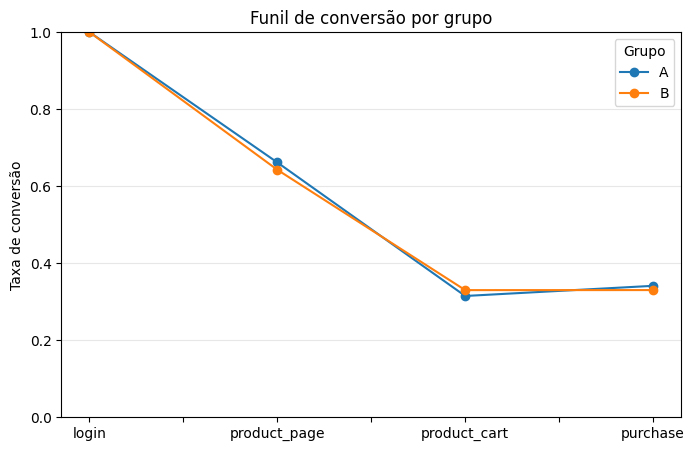

In [19]:
summary = (
    user_funnel
    .groupby('group')[['login', 'product_page', 'product_cart', 'purchase']]
    .sum()
)

funnel_plot = pd.DataFrame({
    'A': [
        1.0,
        summary.loc['A', 'product_page'] / summary.loc['A', 'login'],
        summary.loc['A', 'product_cart'] / summary.loc['A', 'product_page'],
        summary.loc['A', 'purchase'] / summary.loc['A', 'product_cart'],
    ],
    'B': [
        1.0,
        summary.loc['B', 'product_page'] / summary.loc['B', 'login'],
        summary.loc['B', 'product_cart'] / summary.loc['B', 'product_page'],
        summary.loc['B', 'purchase'] / summary.loc['B', 'product_cart'],
    ]
}, index=['login', 'product_page', 'product_cart', 'purchase'])

ax = funnel_plot.plot(marker='o', figsize=(8, 5))
ax.set_title('Funil de conversão por grupo')
ax.set_ylabel('Taxa de conversão')
ax.set_ylim(0, 1)
ax.legend(title='Grupo')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Importante incluir aqui gráficos que ajudemna compreensão do funil de eventos.

Note que ter taxas superiores a 100% indica algum problema nas análises.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Obrigado pelo ajuste!
</div>



O número de eventos por usuário é distribuído igualmente entre as amostras?

In [20]:
events_per_user = (
    df
    .groupby(['group', 'user_id'])
    .size()
    .reset_index(name='event_count')
)

events_per_user.groupby('group')['event_count'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,7874.0,7.45555,4.475159,1.0,4.0,6.0,9.0,40.0
B,6205.0,7.11249,4.246201,1.0,4.0,6.0,9.0,36.0


O número de eventos por usuário apresenta distribuição semelhante entre os grupos A e B, indicando equilíbrio no nível de atividade dos usuários entre as amostras.

Os usuários de ambas as amostras estão presentes?

In [21]:
users_by_group = ptcpt.groupby('group')['user_id'].nunique()
print(users_by_group)

group
A    7874
B    6205
Name: user_id, dtype: int64


In [22]:
duplicates = ptcpt.groupby('user_id')['group'].nunique()
print((duplicates > 1).sum())

441


Foram identificados 441 usuários alocados em mais de um grupo do experimento, o que compromete a independência das amostras e deve ser tratado antes da análise do teste A/B. Dessa forma esses usuários serão excluídos da base.

In [23]:
invalid_users = duplicates[duplicates > 1].index
print(len(invalid_users))

441


In [24]:
ptcpt_clean = ptcpt[~ptcpt['user_id'].isin(invalid_users)]
events_clean = events[~events['user_id'].isin(invalid_users)]

df_clean = events_clean.merge(
    ptcpt_clean[['user_id', 'group']],
    on='user_id',
    how='inner'
)

check = ptcpt_clean.groupby('user_id')['group'].nunique()
print((check > 1).sum())

ptcpt_clean['group'].value_counts()

0


A    7773
B    5870
Name: group, dtype: int64

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Volumetrias e tratativas sobre as amostras foram executadas.
</div>



Como o número de eventos é distribuído entre os dias?

<AxesSubplot:title={'center':'Eventos por dia'}, xlabel='event_dt'>

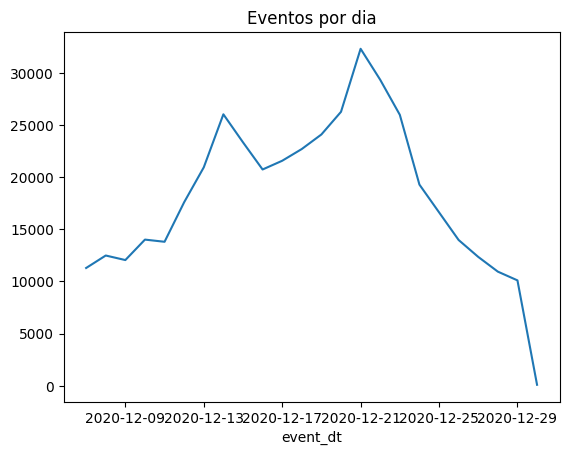

In [25]:

daily_events = (
    events_clean
    .groupby(events_clean['event_dt'].dt.date)
    .size()
)

daily_events.plot(title='Eventos por dia')


<AxesSubplot:title={'center':'Eventos por dia por grupo'}, xlabel='event_dt'>

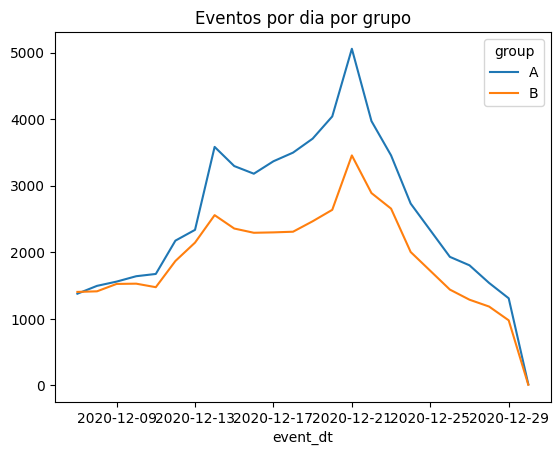

In [26]:
daily_by_group = (
    df
    .groupby([df['event_dt'].dt.date, 'group'])
    .size()
    .unstack()
)

daily_by_group.plot(title='Eventos por dia por grupo')

É possível observar 2 picos,1 próximo ao dia 13 e outro mais agressivo próximo ao dia 21, possivelmente é devido a proximidade como Natal e campanhas promocionais.

Existem quaisquer particularidades nos dados que você deve considerar antes de começar o teste A/B?

Antes da avaliação do teste A/B, é importante considerar que os dados foram coletados durante um período de forte sazonalidade e sob influência de campanhas de marketing simultâneas. Além disso, o experimento é restrito a novos usuários e a uma janela de observação limitada, fatores que podem influenciar o comportamento observado e limitar a generalização dos resultados.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Eventos ao longo dos dias investigados!
</div>



O que você pode dizer sobre os resultados do teste A/B?

In [31]:
purchase_rate_A = funnel_df.loc['purchase', 'A']
purchase_rate_B = funnel_df.loc['purchase', 'B']

purchase_rate_A, purchase_rate_B

(0.3410616229408176, 0.3300380228136882)

In [32]:
lift = (purchase_rate_B / purchase_rate_A - 1) * 100
print(f'lift: {lift:.2f}%')


lift: -3.23%


O grupo A apresentou desempenho superior ao grupo B, com uma taxa de conversão aproximadamente 3,2% maior.

Use um z-test para verificar a diferença estatística entre as proporções.

In [29]:
tests = {
    'Página de produto → Carrinho': ('product_cart', 'product_page'),
    'Carrinho → Compra': ('purchase', 'product_cart')
}

alpha = 0.05

def interpret_ztest(p_value, etapa):
    if p_value > alpha:
        print(
            f'Na etapa {etapa}, não foi observada diferença estatisticamente significativa '
            'entre os grupos A e B, não havendo evidências de que o novo sistema tenha impactado '
            'essa fase do funil.'
        )
    else:
        print(
            f'Na etapa {etapa}, foi identificada diferença estatisticamente significativa '
            'entre os grupos, indicando que o novo sistema influenciou o comportamento '
            'dos usuários nessa fase do funil.'
        )

for etapa, (success, total) in tests.items():
    stat, p_value = proportions_ztest(
        [summary.loc['A', success], summary.loc['B', success]],
        [summary.loc['A', total], summary.loc['B', total]]
    )
    
    print(f'\n{etapa} | p-value = {p_value:.4f}')
    interpret_ztest(p_value, etapa)



Página de produto → Carrinho | p-value = 0.1220
Na etapa Página de produto → Carrinho, não foi observada diferença estatisticamente significativa entre os grupos A e B, não havendo evidências de que o novo sistema tenha impactado essa fase do funil.

Carrinho → Compra | p-value = 0.5285
Na etapa Carrinho → Compra, não foi observada diferença estatisticamente significativa entre os grupos A e B, não havendo evidências de que o novo sistema tenha impactado essa fase do funil.


Descreva suas conclusões sobre a etapa da AED e do resultado do teste A/B.

O teste A/B não apresentou evidências estatísticas de que o novo sistema de recomendações tenha impactado positivamente o funil de conversão. Na etapa de conversão da página de produto para adição ao carrinho, a diferença observada entre os grupos A e B não foi estatisticamente significativa (p-value = 0,12), indicando que o sistema não influenciou a decisão inicial de engajamento com os produtos. De forma consistente, na etapa final de conversão de carrinho para compra, também não foi identificada diferença estatisticamente significativa entre os grupos (p-value = 0,53), o que sugere que o novo sistema não alterou o comportamento dos usuários no momento do checkout. Em conjunto, os resultados indicam que o experimento, na forma como foi conduzido, não fornece evidências suficientes para justificar a implementação do novo sistema em produção. Recomenda-se, portanto, não realizar o rollout da funcionalidade neste momento, priorizar análises qualitativas e quantitativas focadas na experiência de checkout e no posicionamento das recomendações, além de considerar a execução de novos testes A/B com maior poder estatístico ou segmentações específicas por dispositivo e perfil de usuário.

O teste z para diferença de proporções foi utilizado porque o objetivo da análise é comparar taxas de conversão entre dois grupos independentes (controle e teste), tratando-se de uma variável binária (converteu ou não converteu). Além disso, o tamanho amostral é suficientemente grande, o que permite a aproximação normal da distribuição binomial, atendendo aos pressupostos do teste z.

<div style="border: 1px solid #7ec8d3; background-color: #cfeff5; padding: 12px;">
  <strong>Comentário</strong>
  <br><br>
  Realizei os ajustes solicitados.
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

A linha é essa mesma, Suiane. Uma vez que tenhamos certeza que as proporções estão calculadas adequadamente, devemos fazer um z-test em cada uma das etapas para verificar onde há diferença significativa.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Obrigado pelo ajuste!
</div>

